                             Research on Existing Solutions for Object Recognition
                             

Description of Notebook:

   This jupyter notebook will explore the state of the art for machine learning based object recognition. The two architectures most commonly used for object recognition, are YOLO, for real time object recognition, and RCNN for accuracy. The goal of this document is to review, analyize, summarize, and reproduce results of academic articles on those models.
   

Introduction:


   It may be productive to take a step back and define what we mean by object recognition. Object recognition is a area of research in machine learning that focuses on taking an image as input and outputting something useful about that image.There are three general areas; classification, object detection (location), and both at once. Classification is where the model takes an image as input and outputs the name or "class" of what the image is of; like taking an image of a dog as input and outputting "dog" correctly classifying that image. Object detection is taking an image as input and the output would be the location in the image where an object is; for instance taking an image of a garden as input and outputting the pixel locations where plants, birds, or tools are. The final useful thing one could do with an image might be to combine the previously mention methods and take an image as input and output the locations of objects and the correct class that those objects belong to. Now that we have an understanding of what object recognition is and some of the uses of object recognition lets dive into the algorithms.
   
   This notebook will investigate the last category mentioned which is the union of object classification and object detection. There are two state of the art approaches, YOLO and RCNN, and this notebook will investigate both.


First Model, YOLO: 


   The first approach that will be explored is YOLO. YOLO stands for "You only look once" and this model was named this because it takes one image and only does one feed forward pass through the network. This approach results in great speed as other models, like RCNN, have multiple passes through the network. That is why YOLO is widely used for real time object detection, but the speed comes with a hit in accuracy. Over the years YOLO has been improved upon many times. It was first released on June 8th 2015 by Joseph Redmon, Santosh Divvala, Ross Girshick, and Ali Farhadi [1]. Each imporvement made YOLO faster and or more accurate. Today the current version of YOLO is version 7, or YOLOv7. 
   
   
   YOLO Academic Article Numer 1: [2]    YOLOv7-RAR for Urban Vehicle Detection
   
   The YOLOv7-RAR recognition algorithm addresses challenges in vehicle detection on urban roads, such as high missed detection rates, weak perception of small targets, and insufficient feature extraction. It enhances YOLOv7 in three key ways. Firstly, it employs the Res3Unit structure to improve nonlinear feature fusion in the backbone network. Secondly, it introduces the ACmix hybrid attention mechanism to enhance vehicle localization and reduce interference from backgrounds. Lastly, it uses the Gaussian receptive field scheme to enhance small target detection. These improvements result in a 95.1% average detection accuracy, outperforming the original algorithm by 2.4%, with a running speed of 96 FPS for real-time application.
   Unfortunately, the article did not provide any code making this notebook unable to reproduce the code.
   
 YOLO Academic Article Number 2: [3]   A Multiscale Lightweight and Efficient Model Based on YOLOv7: Applied to Citrus Orchard
 
   The article introduces an improved YOLOv7 network model designed to address challenges in unmanned citrus picking technology, including detection accuracy, prediction speed, and model efficiency. This enhanced model incorporates features like a small object detection layer, lightweight convolution, and a CBAM attention mechanism to enable multi-scale feature extraction and reduce parameter count. Testing on a citrus fruit test set yielded impressive results: 97.29% average accuracy (mAP@0.5), 69.38 ms average prediction time, and notable reductions in parameters and computation costs compared to the original YOLOv7. The Citrus-YOLOv7 model outperformed current state-of-the-art networks, indicating its potential for advancing citrus detection solutions.
   Again, this article did not have code publicly available so this notebook cannot reproduce it's efforts.      

RCNN Academic Article Number 1:[4] Faster R-CNN: Towards Real-Time Object Detection With Region Proposal Networks

   This model approach introduces a groundbreaking Region Proposal Network (RPN) that addresses the computational bottleneck in object detection networks by sharing convolutional features with the detection network, allowing for efficient region proposals. The RPN simultaneously predicts object boundaries and objectness scores, resulting in high-quality region proposals. When integrated into a unified network with Fast R-CNN, this approach achieves impressive real-time performance, running at 5 frames per second on a GPU, while maintaining state-of-the-art object detection accuracy across multiple datasets. Additionally, this innovation played a crucial role in 1st-place winning entries in key competitions, with the code made publicly accessible for further research and development.
   
   Deployment and Reproduction of Code:
   (The architecture will be applied to a kaggle dataset as it a more managable size.)

CODE:
    
The code I will reproduce will be the YOLO architecture. The version I will use is version 5. Below I will import the dependencies.

In [16]:
import numpy as np
import pandas as pd
import torch

In [17]:
import os

In [18]:
import cv2

In [19]:
from matplotlib import pyplot as plt

In [20]:
%matplotlib inline

This is where the specific implementation of YOLOv5 is imported from.
The repository was cloned and used in the below code.

To clone repository run this code.
 !git clone https://github.com/ultralytics/yolov5
 
Also work in the folder and install dependencies
 !cd yolov5 & pip install -r requirements.txt

In [6]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in C:\Users\Obama/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-9 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

The below code will train the model. This took about 92 hours to execute on my laptop.

In [ ]:
!cd yolov5 && python train.py --img 416 --batch 16 --epochs 400 --data dataset.yaml --weights yolov5s.pt

The below code will import the trained model.

In [8]:
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/runs/train/exp4/best.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Obama/.cache\torch\hub\master.zip
YOLOv5  2023-9-19 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7150369 parameters, 0 gradients, 16.2 GFLOPs
Adding AutoShape... 


The below code will define the image that will be passed into the model for it to make a prediction.

In [9]:
img = os.path.join("yolov5", "data", "playing_card_dataset_object_detection", "test", "images", "048286661_jpg.rf.746500fa2b97b95d87d4e0c6e29c86ed.jpg")

In [23]:
results = model(img)

In [24]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 416x416 2 3hs, 2 6hs
Speed: 9.5ms pre-process, 468.8ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)

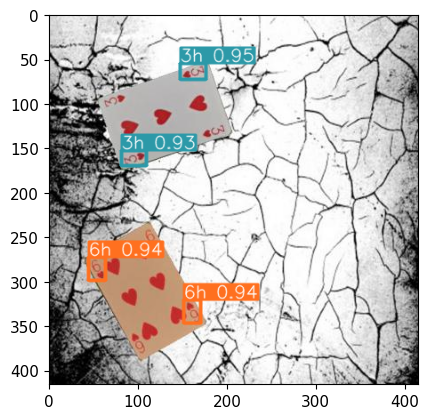

In [27]:
plt.imshow(np.squeeze(results.render()))
plt.show()

New lets look at the training loss charts

CHART 1

In [28]:
loss = os.path.join("yolov5", "runs", "train", "exp4", "results.csv")

In [29]:
df = pd.read_csv(loss)

In [30]:
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.018658,0.007575,0.004273,0.97950,...,0.004981,0.001792,0.070034,0.003329,0.003329
1,1,0.021270,0.007971,0.004417,0.97856,...,0.005472,0.002302,0.040001,0.006630,0.006630
2,2,0.022167,0.008959,0.006005,0.96022,...,0.006036,0.003482,0.009935,0.009897,0.009897
3,3,0.022879,0.010622,0.009301,0.96383,...,0.006251,0.004318,0.009851,0.009851,0.009851
4,4,0.023221,0.010392,0.008604,0.95450,...,0.006319,0.003914,0.009851,0.009851,0.009851


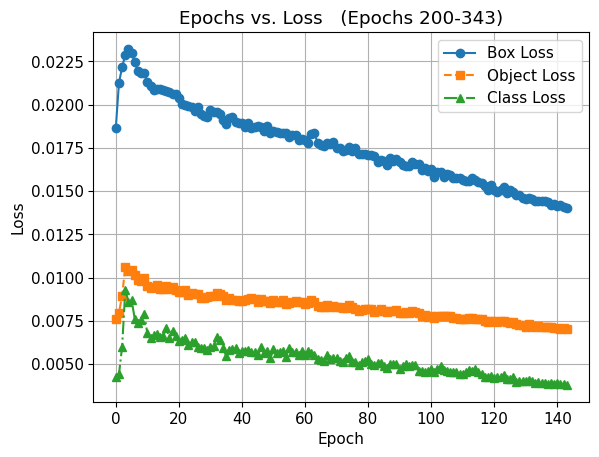

In [31]:
epochs = df["               epoch"]
box_loss = df["      train/box_loss"]
object_loss = df["      train/obj_loss"]
class_loss = df["      train/cls_loss"]

plt.plot(epochs, box_loss, label="Box Loss", marker="o", linestyle="-")
plt.plot(epochs, object_loss, label="Object Loss", marker="s", linestyle="--")
plt.plot(epochs, class_loss, label="Class Loss", marker="^", linestyle="-.")
plt.title("Epochs vs. Loss   (Epochs 200-343)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In summary, our model was able to get around a 98.5% accuracy when it came to detecting where the correct area was to place a box (ie locating the area in the image where the card name was). And, we got about 99.6% accuracy when it came to classifying the correct card. 

This performance is quiet decent.

1. Redmon J., Divvala S., Girshick R., Farhadi A., You Only Look Once: Unified, Real-Time Object Detection. arXiv:1506.02640        https://doi.org/10.48550/arXiv.1506.02640        https://arxiv.org/abs/1506.02640

2. Zhang Y, Sun Y, Wang Z, Jiang Y. YOLOv7-RAR for Urban Vehicle Detection. Sensors (Basel). 2023 Feb 6;23(4):1801. doi: 10.3390/s23041801. PMID: 36850399; PMCID: PMC9964850. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9964850/

3.  Chen J, Liu H, Zhang Y, Zhang D, Ouyang H, Chen X. A Multiscale Lightweight and Efficient Model Based on YOLOv7: Applied to Citrus Orchard. Plants. 2022; 11(23):3260. https://doi.org/10.3390/plants11233260  https://www.mdpi.com/2223-7747/11/23/3260

4. https://arxiv.org/abs/1506.01497
